In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix

print(tf.__version__)

2.0.0


In [2]:
# Load training data saved locally
path = 'data/'
filename = 'named_train.csv'
df = pd.read_csv(path+filename)

In [3]:
# Sample view
df.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,45,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Set up the 47 class labels so we can decode our label values in the dataset later
class_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 
                'W', 'X', 'Y', 'Z',
                'a', 'b', 'd', 'e', 'f', 'g', 'h', 'n', 'q', 'r', 't']

In [5]:
# Delineate labeled output and sample pixels in training data
X_train = df.iloc[:,1:]
y_train = df.iloc[:,0]

In [6]:
X_train.shape

(112800, 784)

In [7]:
len(y_train)

112800

In [8]:
# Convert training samples to 2D (28x28 image for each sample)
X_train = X_train.values.reshape(-1,28,28)

In [9]:
X_train.shape

(112800, 28, 28)

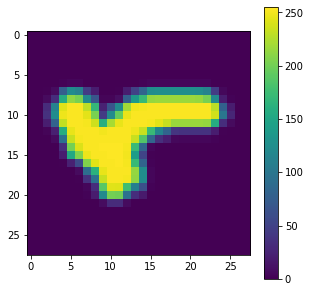

In [10]:
# What does the first image in the training set look like?

plt.figure(figsize=(5,5))
#rotated to make human-friendly, as original data has images inverted horizontally and rotated 90 anti-clockwise.
plt.imshow(tf.transpose(X_train[0])) 
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Scale training pixel values to a range of 0 to 1 (rather than 0-255) to visualize better
# before feeding them to the neural network model. 
train_images = X_train/255.0

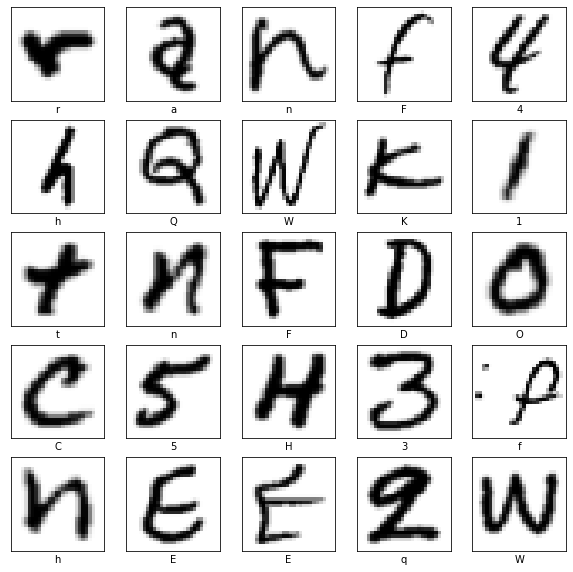

In [12]:
# Display first 25 images from training set, along with their label underneath
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.transpose(train_images[i]), cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_train[i]])
plt.show()

In [13]:
# Build the model by setting up layers

# The first (input) layer in this network transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) 
# back to a one-dimensional array (of 28 * 28 = 784 pixels). This layer has no parameters to learn; it only reformats the data.

# After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. 
# These are densely connected, or fully connected, neural layers. 

# The first (hidden) Dense layer has 784 nodes (or neurons). 

# The second (output) layer returns a logits array with length of 47. Each node contains a score that indicates the current 
# image belongs to one of the 47 classes.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(784, activation='relu'),
    keras.layers.Dense(47)
])

# Rule of thumb for hidden layer number of neurons is to use 2/3 size of input layer + output layer, so 2/3(784) + 47 = 570
# source: https://www.heatonresearch.com/2017/06/01/hidden-layers.html
# But since we eventually add dropout layer, higher accuracy is achieved by using hidden units = input layer size

In [14]:
# Compile step needed before training
# Loss function — This measures how accurate the model is during training. 
# You want to minimize this function to "steer" the model in the right direction.
# Optimizer — This is how the model is updated based on the data it sees and its loss function.
# Metrics — Used to monitor the training and testing steps. Here we use accuracy, the fraction of the images 
# that are correctly classified.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Extracted training labels from Pandas dataframe need to be converted to numpy array as input for the model
train_labels=y_train.to_numpy()

In [16]:
train_labels

array([45, 36, 43, ..., 23, 31,  8], dtype=int64)

In [17]:
# Train the model
model.fit(train_images, train_labels, epochs=10)

Train on 112800 samples
Epoch 1/10
112800/112800 [==============================] - 11s 94us/sample - loss: 0.8155 - accuracy: 0.7528
Epoch 2/10
112800/112800 [==============================] - 10s 92us/sample - loss: 0.4982 - accuracy: 0.8332
Epoch 3/10
112800/112800 [==============================] - 10s 89us/sample - loss: 0.4198 - accuracy: 0.8540 - los
Epoch 4/10
112800/112800 [==============================] - 10s 91us/sample - loss: 0.3721 - accuracy: 0.8684
Epoch 5/10
112800/112800 [==============================] - 10s 91us/sample - loss: 0.3342 - accuracy: 0.8772
Epoch 6/10
112800/112800 [==============================] - 10s 91us/sample - loss: 0.3064 - accuracy: 0.8859
Epoch 7/10
112800/112800 [==============================] - 10s 93us/sample - loss: 0.2832 - accuracy: 0.8928
Epoch 8/10
112800/112800 [==============================] - 10s 92us/sample - loss: 0.2626 - accuracy: 0.8995
Epoch 9/10
112800/112800 [==============================] - 10s 92us/sample - loss: 0.2442

In [18]:
# Load test data saved locally
path = 'data/'
filename = 'named_test.csv'
df2 = pd.read_csv(path+filename)

In [19]:
# Sample view
df2.head()

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x775,x776,x777,x778,x779,x780,x781,x782,x783,x784
0,41,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Delineate labeled output and sample pixels in test data
X_test = df2.iloc[:,1:]
y_test = df2.iloc[:,0]

In [21]:
X_test.shape

(18800, 784)

In [22]:
len(y_test)

18800

In [23]:
# Convert test samples to 2D (28x28 image for each sample)
X_test = X_test.values.reshape(-1,28,28)

In [24]:
X_test.shape

(18800, 28, 28)

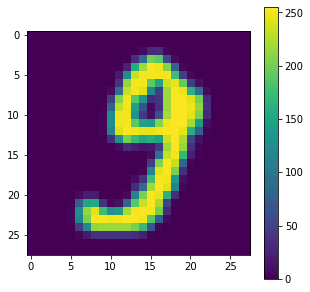

In [25]:
# What does the first image in the test set look like?
plt.figure(figsize=(5,5))
plt.imshow(tf.transpose(X_test[0]))
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
# Scale test pixel values to a range of 0 to 1 (rather than 0-255) to visualize better 
# before feeding them to the neural network model.
test_images = X_test/255.0

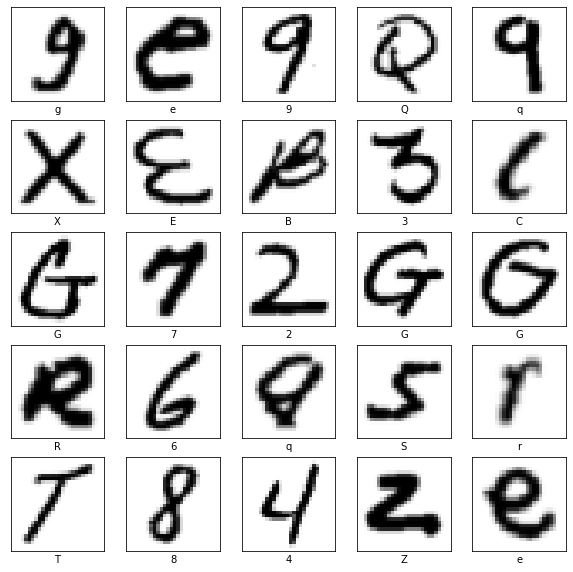

In [27]:
# Display first 25 images from test set, along with their label underneath
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.transpose(test_images[i]), cmap=plt.cm.binary)
    plt.xlabel(class_labels[y_test[i]])
plt.show()

In [28]:
# Extracted test labels from Pandas dataframe need to be converted to numpy array as input for the model
test_labels=y_test.to_numpy()

In [29]:
test_labels

array([41, 39,  9, ...,  1, 26, 33], dtype=int64)

In [30]:
# How does the model perform on the test set?

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

18800/1 - 2s - loss: 0.5669 - accuracy: 0.8337

Test accuracy: 0.8337234


In [31]:
# Let's try to address the overfitting by incorporating a Dropout layer

do_model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(784, activation='relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(47)
])

do_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
# Train model after adding Dropout layer
do_model.fit(train_images, train_labels, epochs=10)

Train on 112800 samples
Epoch 1/10
112800/112800 [==============================] - 10s 92us/sample - loss: 1.0663 - accuracy: 0.6819
Epoch 2/10
112800/112800 [==============================] - 11s 94us/sample - loss: 0.7323 - accuracy: 0.7681
Epoch 3/10
112800/112800 [==============================] - 11s 94us/sample - loss: 0.6614 - accuracy: 0.7879
Epoch 4/10
112800/112800 [==============================] - 11s 93us/sample - loss: 0.6253 - accuracy: 0.7970 - loss: 0.6253 - accuracy: 0.
Epoch 5/10
112800/112800 [==============================] - 11s 93us/sample - loss: 0.6012 - accuracy: 0.8031
Epoch 6/10
112800/112800 [==============================] - 11s 93us/sample - loss: 0.5795 - accuracy: 0.8103
Epoch 7/10
112800/112800 [==============================] - 11s 93us/sample - loss: 0.5667 - accuracy: 0.8124
Epoch 8/10
112800/112800 [==============================] - 11s 93us/sample - loss: 0.5558 - accuracy: 0.8160
Epoch 9/10
112800/112800 [==============================] - 11s 93

In [33]:
# How does the tuned model perform on the test set?

test_loss, test_acc = do_model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

18800/1 - 2s - loss: 0.6244 - accuracy: 0.8422

Test accuracy: 0.84218085


In [34]:
# Now that the tuned model has been trained (and greatly reduces overfitting, while achieving higher test set accuracy),
# convert logits to probabilities by attaching a soft layer (easier to interpret)
probability_model = tf.keras.Sequential([do_model, 
                                         tf.keras.layers.Softmax()])

In [35]:
# The model's prediction for each sample image is an array of 47 floats, representing confidence. 
predictions = probability_model.predict(test_images)

In [36]:
print(predictions)

[[1.46507216e-06 5.78279868e-09 4.39152492e-09 ... 4.67781618e-04
  1.00173309e-12 1.92477188e-07]
 [1.23986704e-13 4.01877126e-13 3.24858682e-11 ... 2.97448281e-07
  2.63739679e-08 2.10189301e-05]
 [5.79789385e-12 1.08131473e-11 2.63010811e-11 ... 9.93956849e-02
  5.96608318e-10 1.24724444e-08]
 ...
 [2.84613236e-11 5.51277637e-01 4.64022110e-09 ... 1.06954445e-07
  1.88384917e-08 5.36880456e-04]
 [5.60752198e-07 2.06489665e-12 4.09362883e-07 ... 3.19430110e-04
  9.81289494e-11 3.38274059e-13]
 [5.79731207e-10 4.45252343e-04 3.82739972e-06 ... 3.42486528e-05
  1.05231383e-03 7.40049727e-05]]


In [37]:
# Output of 47 probabilities for the first test sample
predictions[0]

array([1.4650722e-06, 5.7827987e-09, 4.3915249e-09, 2.3423838e-03,
       2.4715938e-08, 3.1834337e-05, 9.2195467e-17, 5.8501537e-06,
       1.2754109e-07, 7.9097655e-03, 9.1742169e-10, 1.0879644e-06,
       1.3178249e-10, 3.2058946e-08, 5.8865742e-12, 5.1210289e-09,
       2.8317833e-08, 2.0039534e-11, 4.4093496e-10, 1.2924896e-05,
       8.8293435e-13, 1.0935660e-10, 3.2494851e-13, 6.9949615e-12,
       1.2817081e-06, 7.6306272e-10, 3.0633218e-10, 2.6178536e-15,
       1.0928077e-05, 5.5380402e-09, 9.0414939e-11, 1.4690643e-09,
       7.3911607e-14, 6.1701894e-10, 1.9737789e-02, 9.4924900e-07,
       4.2226196e-09, 2.1859018e-11, 2.3939338e-08, 1.5510292e-12,
       7.7628896e-11, 9.6947551e-01, 2.1570742e-12, 1.4412354e-13,
       4.6778162e-04, 1.0017331e-12, 1.9247719e-07], dtype=float32)

In [38]:
# The outputted prediction is the label with the highest confidence value
np.argmax(predictions[0])

41

In [39]:
# Actual test label, to compare (classification is correct!)
test_labels[0]

41

In [40]:
# Store all outputted predictions for test images
predicted = np.argmax(predictions, axis = 1)

In [41]:
print(predicted)

[41 39  9 ...  1 26 33]


In [42]:
# We have already outputted our actual labels from the test set
actual = test_labels
print(actual)

[41 39  9 ...  1 26 33]


In [43]:
# Calculate accuracy, precision and recall using metrics package
print(f"Accuracy:\n{round(metrics.accuracy_score(actual,predicted),4)}")
print(f"Precision:\n{metrics.precision_score(actual,predicted,average=None)}")
print(f"Recall:\n{metrics.recall_score(actual,predicted,average=None)}")

Accuracy:
0.8422
Precision:
[0.60887949 0.5490982  0.86764706 0.95049505 0.8440367  0.91436464
 0.8808933  0.92142857 0.89459459 0.6502947  0.95854922 0.86682243
 0.87793427 0.88659794 0.98128342 0.63988095 0.89826303 0.93622449
 0.6519337  0.8804878  0.95778364 0.54366197 0.93467337 0.85714286
 0.66120219 0.92457421 0.84490741 0.93316832 0.83602771 0.91025641
 0.87234043 0.90632911 0.97222222 0.94722955 0.93002915 0.91374663
 0.83505155 0.89924433 0.9375     0.9125     0.58256881 0.66763006
 0.9213198  0.90862944 0.62962963 0.87703016 0.8617284 ]
Recall:
[0.72   0.685  0.885  0.96   0.92   0.8275 0.8875 0.9675 0.8275 0.8275
 0.925  0.9275 0.935  0.86   0.9175 0.5375 0.905  0.9175 0.59   0.9025
 0.9075 0.4825 0.93   0.96   0.605  0.95   0.9125 0.9425 0.905  0.8875
 0.9225 0.895  0.9625 0.8975 0.7975 0.8475 0.81   0.8925 0.9375 0.9125
 0.635  0.5775 0.9075 0.895  0.4675 0.945  0.8725]


In [44]:
# Classification report 
print(metrics.classification_report(actual,predicted))

              precision    recall  f1-score   support

           0       0.61      0.72      0.66       400
           1       0.55      0.69      0.61       400
           2       0.87      0.89      0.88       400
           3       0.95      0.96      0.96       400
           4       0.84      0.92      0.88       400
           5       0.91      0.83      0.87       400
           6       0.88      0.89      0.88       400
           7       0.92      0.97      0.94       400
           8       0.89      0.83      0.86       400
           9       0.65      0.83      0.73       400
          10       0.96      0.93      0.94       400
          11       0.87      0.93      0.90       400
          12       0.88      0.94      0.91       400
          13       0.89      0.86      0.87       400
          14       0.98      0.92      0.95       400
          15       0.64      0.54      0.58       400
          16       0.90      0.91      0.90       400
          17       0.94    

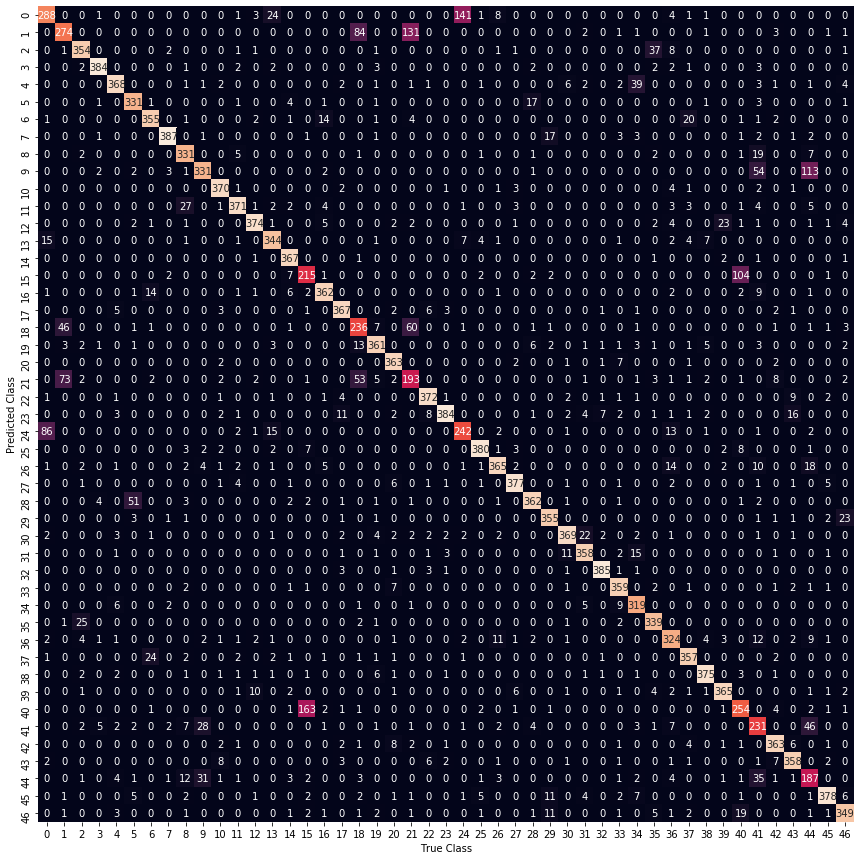

In [45]:
# Heatmapped Confusion Matrix
plt.rcParams['figure.figsize'] = (15,15)
mat=confusion_matrix(actual,predicted)
sns.heatmap(mat.T,square=True,annot=True, fmt='d',cbar=False)
plt.xlabel('True Class')
plt.ylabel('Predicted Class')
plt.show()